## https://archive.ics.uci.edu/dataset/267/banknote+authentication

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.  

        1. variance of Wavelet Transformed image (continuous) 
        2. skewness of Wavelet Transformed image (continuous)
        3. curtosis of Wavelet Transformed image (continuous)
        4. entropy of image (continuous)
        5. class (integer) 


In [5]:
df=pd.read_csv('data_banknote_authentication.csv') 
df.drop(['curtosis','entropy'],axis=1,inplace=True) 
df=df.sample(frac=1)  

,variance,skewness,class
115,2.533100,2.913500,0
739,1.821600,-6.474800,0
473,2.820900,7.310800,0
773,-1.525200,-6.253400,1
816,-4.855400,-5.903700,1
...,...,...,...
774,-0.614420,-0.091058,1
732,-2.714300,11.453500,0
980,0.636550,5.202200,1
1159,-2.565000,-5.789900,1


In [12]:
X=df[['variance','skewness']].values 
Y=df['class'].values 

In [13]:

indices = np.arange(X.shape[0])
np.random.seed(2)
np.random.shuffle(indices)
train_size = int(0.8 * X.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = Y[train_indices], Y[test_indices]

In [26]:
import random

In [93]:
eta_random = random.choice(np.linspace(0.0001, 0.1, 20))
tol_random = random.choice(np.linspace(0.0001, 0.1, 20))
alpha_random = random.choice(np.linspace(0.0001, 0.1, 20))

max_iter_random = random.choice(np.linspace(200, 2000, 20).astype(int))
penalty_random = random.choice(['l2', 'l1', 'elasticnet'])
solver_random = random.choice(['lbfgs', 'sgd', 'adam'])
activation_random = random.choice(['relu', 'identity', 'logistic', 'tanh'])

print(f'eta_random:{eta_random}, tol_random:{tol_random}, alpha_random:{alpha_random}')
print(f'max_iter_random:{max_iter_random}, penalty_rando:{penalty_random}, solver_random:{solver_random}, activation_random:{activation_random}')

eta_random:0.05793684210526316, tol_random:0.005357894736842106, alpha_random:0.05267894736842106
max_iter_random:863, penalty_rando:elasticnet, solver_random:lbfgs, activation_random:tanh


Random: 0; accuracy: 0.8
Random: 1; accuracy: 0.8581818181818182
Random: 2; accuracy: 0.39636363636363636
Random: 3; accuracy: 0.8763636363636363
Random: 5; accuracy: 0.8945454545454545
eta_random:0.05793684210526316, tol_random:0.005357894736842106, alpha_random:0.05267894736842106
max_iter_random:863, penalty_rando:elasticnet, solver_random:lbfgs, activation_random:tanh
Perceptron:  0.39636363636363636 0.8581818181818182 0.8945454545454545 0.1870745641769171
Perceptron with Norm:  0.850909090909091 0.8727272727272727 0.9090909090909091 0.020049525457585763
MLP:  0.6036363636363636 0.8690909090909091 0.8727272727272727 0.10620672186163663
MLP with Norm:  0.6036363636363636 0.6036363636363636 0.9090909090909091 0.14964155519548142


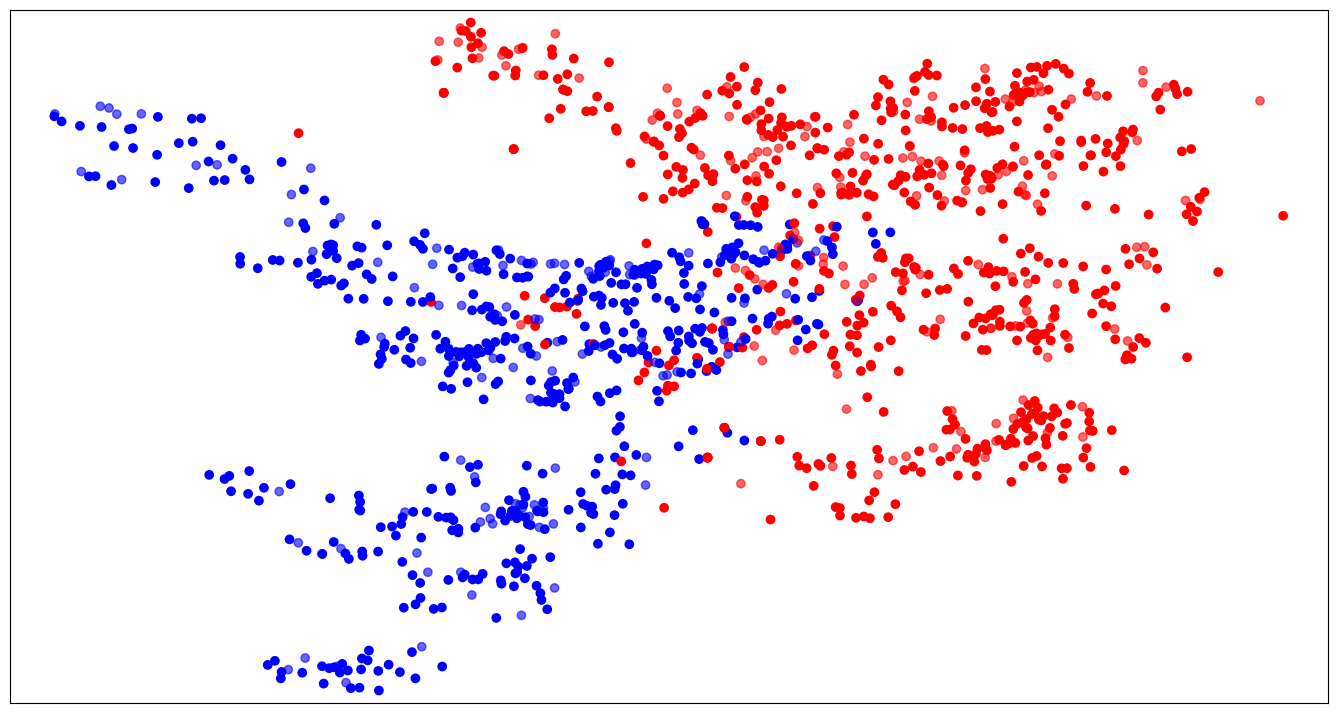

In [96]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier


def median(lst):
    return np.median(np.array(lst))


rs = np.linspace(0,5,num=5)

acc_p = []
acc_pn = []
acc_mlp = []
acc_mlpn = []

for i in rs:
    i = int(i)
    clf = Perceptron(random_state=i,eta0 = eta_random, alpha= alpha_random
                     , max_iter= max_iter_random, tol= tol_random, penalty= penalty_random)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Random: {}; accuracy: {}".format(i, acc))
    acc_p.append(acc)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = Perceptron(random_state=i,eta0 = eta_random, alpha= alpha_random
                     , max_iter= max_iter_random, tol= tol_random, penalty= penalty_random)
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "Perceptron with normalization: ", acc
    acc_pn.append(acc)

    mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01, hidden_layer_sizes=(1, 20, 20, 1), max_iter=2000, tol=0.00000001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlp.append(acc)

    mlp = MLPClassifier(random_state=i, solver=solver_random, activation=activation_random
                        , alpha= alpha_random, tol= tol_random, hidden_layer_sizes=(1, 20, 20, 1), max_iter= max_iter_random)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlpn.append(acc)

print(f'eta_random:{eta_random}, tol_random:{tol_random}, alpha_random:{alpha_random}')
print(f'max_iter_random:{max_iter_random}, penalty_rando:{penalty_random}, solver_random:{solver_random}, activation_random:{activation_random}')

print("Perceptron: ", min(acc_p), median(acc_p), max(acc_p), np.std(acc_p))
print("Perceptron with Norm: ", min(acc_pn), median(acc_pn), max(acc_pn), np.std(acc_pn))
print("MLP: ", min(acc_mlp), median(acc_mlp), max(acc_mlp), np.std(acc_mlp))
print("MLP with Norm: ", min(acc_mlpn), median(acc_mlpn), max(acc_mlpn), np.std(acc_mlpn))

X = np.concatenate((X_train, X_test), axis=0)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

figure = plt.figure(figsize=(17, 9))
cm = plt.cm.RdBu
cm_bright = mpl.colors.ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 1, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
plt.show()

Perceptron:  0.7709090909090909 0.8836363636363637 0.9163636363636364 0.0507008728958062
Perceptron with Norm:  0.6981818181818182 0.8436363636363636 0.9163636363636364 0.07691231456815874
MLP:  0.8218181818181818 0.84 0.8618181818181818 0.01535906333232211
MLP with Norm:  0.9454545454545454 0.9490909090909091 0.9527272727272728 0.002721205372199248

eta_random:0.06319473684210526, tol_random:0.06319473684210526, alpha_random:0.07896842105263159
max_iter_random:484, penalty_rando:l1, solver_random:lbfgs, activation_random:identity
Perceptron:  0.8327272727272728 0.8581818181818182 0.9163636363636364 0.031734435242576624
Perceptron with Norm:  0.850909090909091 0.850909090909091 0.8836363636363637 0.013090909090909087
MLP:  0.850909090909091 0.8618181818181818 0.88 0.009370253619436445
MLP with Norm:  0.8945454545454545 0.9163636363636364 0.9236363636363636 0.010181818181818184

eta_random:0.03164736842105263, tol_random:0.0001, alpha_random:0.0001
max_iter_random:673, penalty_rando:elasticnet, solver_random:lbfgs, activation_random:tanh
Perceptron:  0.8 0.88 0.92 0.048916863187782496
Perceptron with Norm:  0.6509090909090909 0.7745454545454545 0.92 0.09202227542043134
MLP:  0.7090909090909091 0.7854545454545454 0.7927272727272727 0.03661007403244572
MLP with Norm:  0.9236363636363636 0.9345454545454546 0.9563636363636364 0.011499191491521404

eta_random:0.06845263157894738, tol_random:0.0947421052631579, alpha_random:0.07371052631578948
max_iter_random:1052, penalty_rando:l2, solver_random:sgd, activation_random:tanh
Perceptron:  0.7709090909090909 0.8581818181818182 0.9054545454545454 0.04840599648667269
Perceptron with Norm:  0.8690909090909091 0.8872727272727273 0.9163636363636364 0.017754989986521735
MLP:  0.39636363636363636 0.6036363636363636 0.7163636363636363 0.10350294442252467
MLP with Norm:  0.39636363636363636 0.6036363636363636 0.730909090909091 0.1085903668314784

eta_random:0.0947421052631579, tol_random:0.02113157894736842, alpha_random:0.02113157894736842
max_iter_random:1810, penalty_rando:l2, solver_random:sgd, activation_random:relu
Perceptron:  0.8 0.88 0.9090909090909091 0.04025702546355793
Perceptron with Norm:  0.8545454545454545 0.8909090909090909 0.92 0.02374520395245749
MLP:  0.3563636363636364 0.6036363636363636 0.6036363636363636 0.11205665627206637
MLP with Norm:  0.3781818181818182 0.6036363636363636 0.6036363636363636 0.10615192605392837

eta_random:0.06319473684210526, tol_random:0.06319473684210526, alpha_random:0.07371052631578948
max_iter_random:863, penalty_rando:l1, solver_random:lbfgs, activation_random:identity
Perceptron:  0.7563636363636363 0.8472727272727273 0.8618181818181818 0.04110217062093032
Perceptron with Norm:  0.7236363636363636 0.850909090909091 0.9054545454545454 0.06224876778627101
MLP:  0.850909090909091 0.8618181818181818 0.88 0.009370253619436445
MLP with Norm:  0.8945454545454545 0.9163636363636364 0.9236363636363636 0.010181818181818184

eta_random:0.06845263157894738, tol_random:0.0001, alpha_random:0.07371052631578948
max_iter_random:578, penalty_rando:l2, solver_random:adam, activation_random:identity
Perceptron:  0.7927272727272727 0.8763636363636363 0.8836363636363637 0.04029642233365839
Perceptron with Norm:  0.8036363636363636 0.850909090909091 0.9127272727272727 0.03530083228948829
MLP:  0.8618181818181818 0.8690909090909091 0.8727272727272727 0.003983436781855739
MLP with Norm:  0.9054545454545454 0.9090909090909091 0.9127272727272727 0.002299838298304291


Random: 0; accuracy: 0.8581818181818182
Random: 1; accuracy: 0.9018181818181819
Random: 2; accuracy: 0.9127272727272727
Random: 3; accuracy: 0.88
Random: 5; accuracy: 0.8618181818181818
Perceptron:  0.8581818181818182 0.88 0.9127272727272727 0.02150072072595562
Perceptron with Norm:  0.84 0.9054545454545454 0.9127272727272727 0.02687959070920193
MLP:  0.8690909090909091 0.8690909090909091 0.8690909090909091 0.0
MLP with Norm:  0.9090909090909091 0.9127272727272727 0.9309090909090909 0.007627700713964746


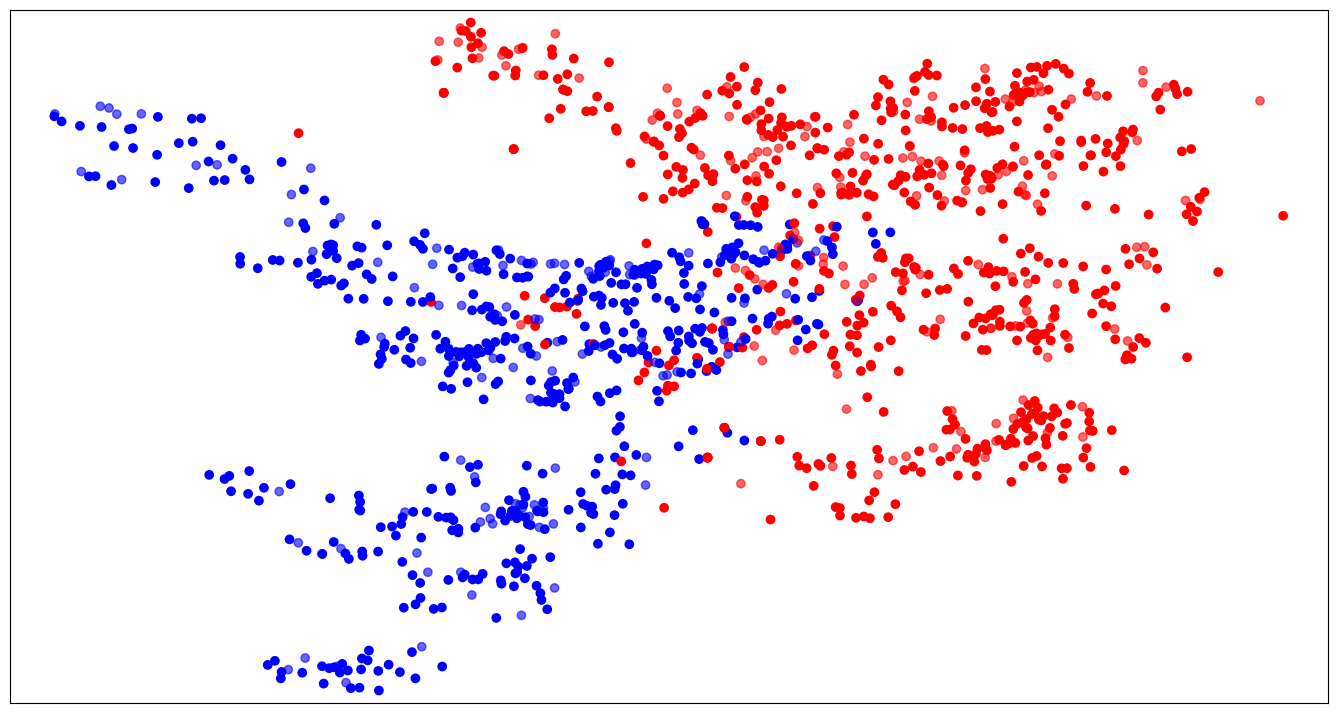

In [110]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

def median(lst):
    return np.median(np.array(lst))

rs = np.linspace(0,5,num=5)

acc_p = []
acc_pn = []
acc_mlp = []
acc_mlpn = []



for i in rs:

    i = int(i)
    clf = Perceptron(random_state=i,eta0 = 0.01164736842105263, alpha= 0.0001
                     , max_iter= 673, tol= 0.0001, penalty= 'l2')
    
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    print("Random: {}; accuracy: {}".format(i, acc))
    acc_p.append(acc)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = Perceptron(random_state=i, eta0 = 0.06, alpha= 0.07
                     , max_iter= 1052, tol= 0.09, penalty= 'l2')
    
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "Perceptron with normalization: ", acc
    acc_pn.append(acc)

    mlp = MLPClassifier(random_state=i, solver="adam", activation="identity", alpha=0.0001, hidden_layer_sizes=(2, 20, 20, 1), max_iter=2000, tol=0.00000001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  acc
    acc_mlp.append(acc)

    mlp = MLPClassifier(random_state=i, solver="sgd", activation="tanh", alpha=0.01, hidden_layer_sizes=(2, 20, 20, 1), max_iter=2000, tol=0.0001)
    mlp.fit(X_train_scaled, y_train)
    predictions = mlp.predict(X_test_scaled)
    acc = accuracy_score(y_test, predictions)
    # print "MLP: ",  accW
    acc_mlpn.append(acc)

print("Perceptron: ", min(acc_p), median(acc_p), max(acc_p), np.std(acc_p))
print("Perceptron with Norm: ", min(acc_pn), median(acc_pn), max(acc_pn), np.std(acc_pn))
print("MLP: ", min(acc_mlp), median(acc_mlp), max(acc_mlp), np.std(acc_mlp))
print("MLP with Norm: ", min(acc_mlpn), median(acc_mlpn), max(acc_mlpn), np.std(acc_mlpn))

X = np.concatenate((X_train, X_test), axis=0)
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

figure = plt.figure(figsize=(17, 9))
cm = plt.cm.RdBu
cm_bright = mpl.colors.ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(1, 1, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(())
ax.set_yticks(())
plt.show()